## Modeling data

In [42]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier



In [10]:
# reading data
titanic = pd.read_csv('/Users/arqavan/Downloads/cleaned_titanic_data.csv')

In [11]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Pclass      889 non-null    int64  
 2   Sex         889 non-null    int64  
 3   Age         889 non-null    float64
 4   SibSp       889 non-null    int64  
 5   Parch       889 non-null    int64  
 6   Fare        889 non-null    float64
 7   Embarked_Q  889 non-null    int64  
 8   Embarked_S  889 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.6 KB


In [12]:
# feature and label

X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

In [14]:
# split train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## LogisticRegression

In [15]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [17]:
lr_y_pred = lr_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, lr_y_pred))
print("Classification Report:\n", classification_report(y_test, lr_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_y_pred))

Accuracy: 0.8033707865168539
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       109
           1       0.73      0.78      0.76        69

    accuracy                           0.80       178
   macro avg       0.79      0.80      0.80       178
weighted avg       0.81      0.80      0.80       178

Confusion Matrix:
 [[89 20]
 [15 54]]


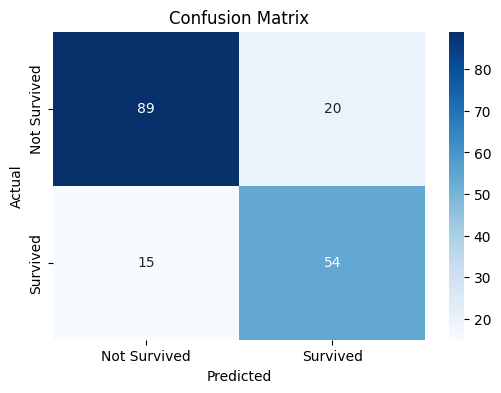

In [19]:
cm = confusion_matrix(y_test,lr_y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


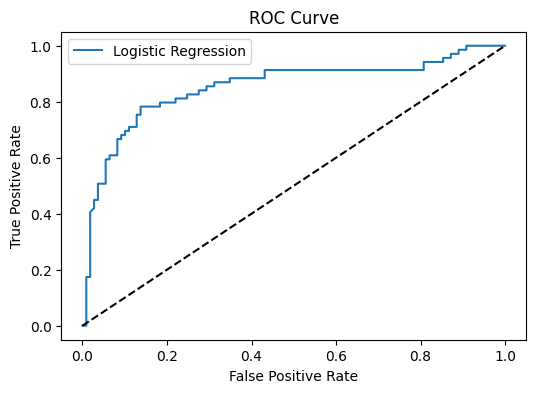

AUC Score: 0.8522138013562026


In [20]:
y_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0,1], [0,1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# AUC Score
auc_score = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc_score)


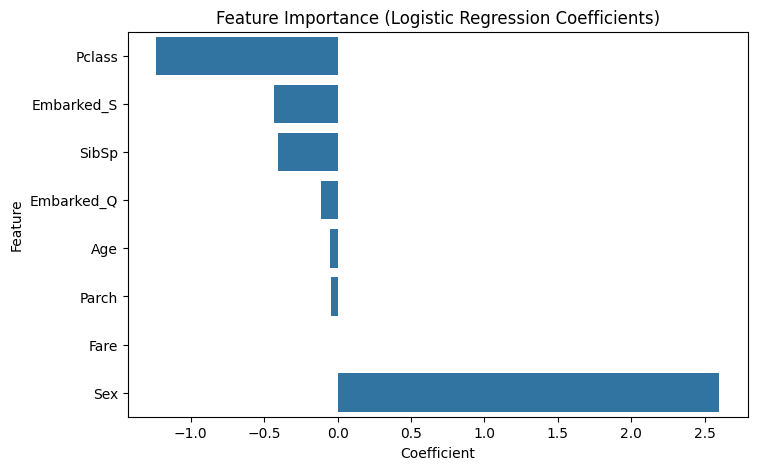

In [22]:
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_[0]
}).sort_values(by='Coefficient')

plt.figure(figsize=(8,5))
sns.barplot(data=coeff_df, x='Coefficient', y='Feature')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.show()


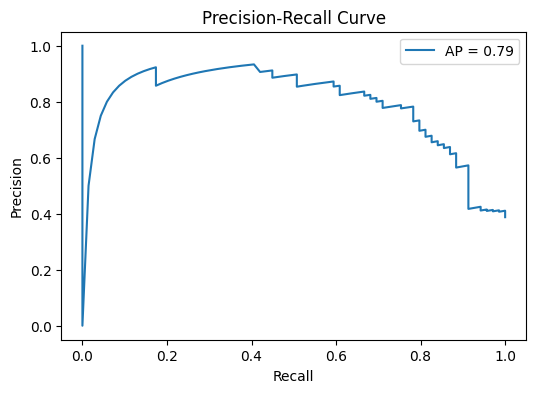

In [25]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
avg_precision = average_precision_score(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'AP = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


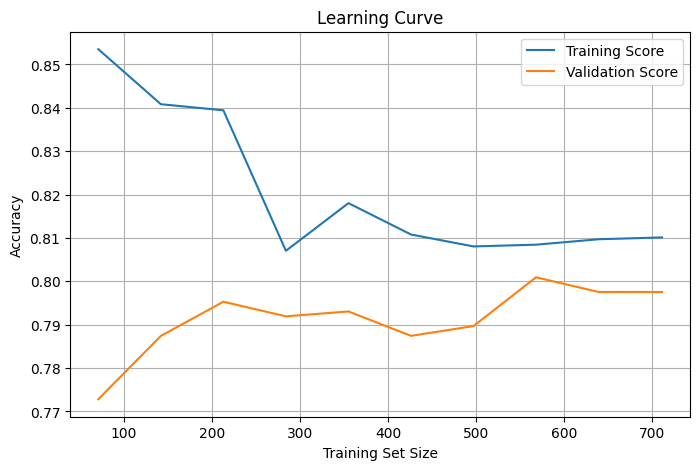

In [30]:
train_sizes, train_scores, val_scores = learning_curve(
    lr_model, X, y, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, val_mean, label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

##  Random Forest

In [32]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
rf_pred = rf_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))

Accuracy: 0.7471910112359551
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.75      0.78       109
           1       0.65      0.74      0.69        69

    accuracy                           0.75       178
   macro avg       0.74      0.75      0.74       178
weighted avg       0.76      0.75      0.75       178

Confusion Matrix:
 [[82 27]
 [18 51]]


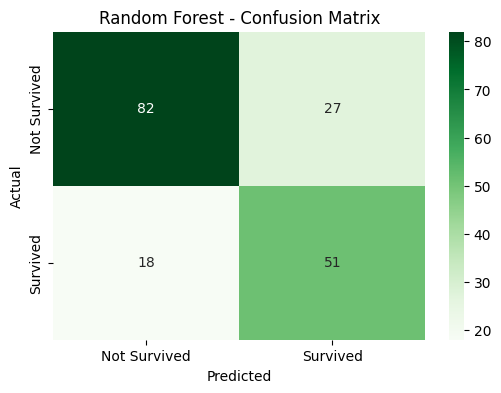

In [35]:
cm_rf = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest - Confusion Matrix')
plt.show()


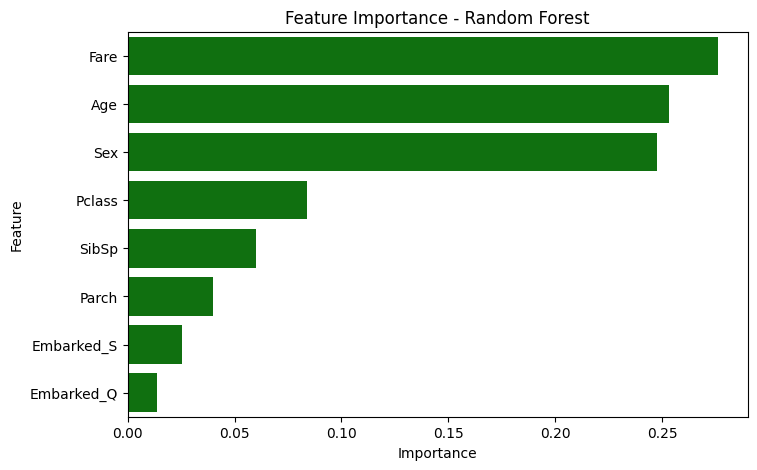

In [36]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(data=feature_importance, x='Importance', y='Feature', color='green')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


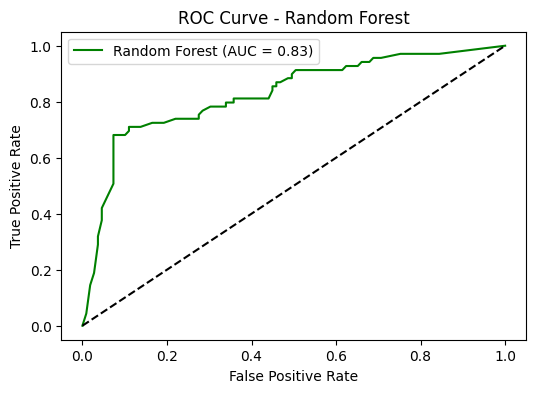

In [38]:
rf_prob = rf_model.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_prob)
auc_rf = roc_auc_score(y_test, rf_prob)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_prob)
auc_rf = roc_auc_score(y_test, rf_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr_rf, tpr_rf, color='green', label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()


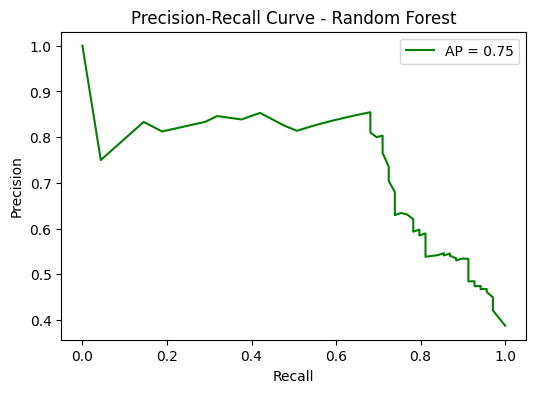

In [39]:
precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_prob)
avg_precision_rf = average_precision_score(y_test, rf_prob)

plt.figure(figsize=(6,4))
plt.plot(recall_rf, precision_rf, color='green', label=f'AP = {avg_precision_rf:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest')
plt.legend()
plt.show()

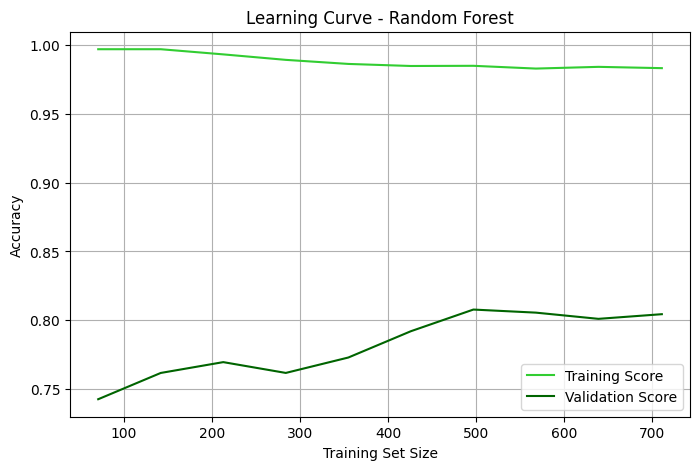

In [41]:
train_sizes_rf, train_scores_rf, val_scores_rf = learning_curve(
    rf_model, X, y, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1, random_state=42
)
plt.figure(figsize=(8,5))
plt.plot(train_sizes_rf, train_scores_rf.mean(axis=1), label='Training Score', color='limegreen')
plt.plot(train_sizes_rf, val_scores_rf.mean(axis=1), label='Validation Score', color='darkgreen')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Random Forest')
plt.legend()
plt.grid(True)
plt.show()

## DecisionTreeClassifier

In [43]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [44]:
dt_pred = dt_model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, dt_pred))
print("Classification Report:\n", classification_report(y_test, dt_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_pred))


Accuracy: 0.7921348314606742
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       109
           1       0.72      0.77      0.74        69

    accuracy                           0.79       178
   macro avg       0.78      0.79      0.78       178
weighted avg       0.80      0.79      0.79       178

Confusion Matrix:
 [[88 21]
 [16 53]]


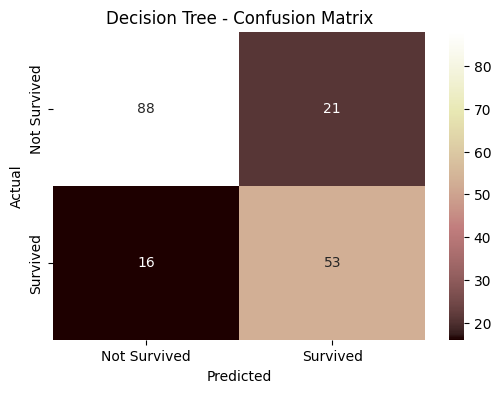

In [59]:
cm_dt = confusion_matrix(y_test, dt_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='pink',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree - Confusion Matrix')
plt.show()


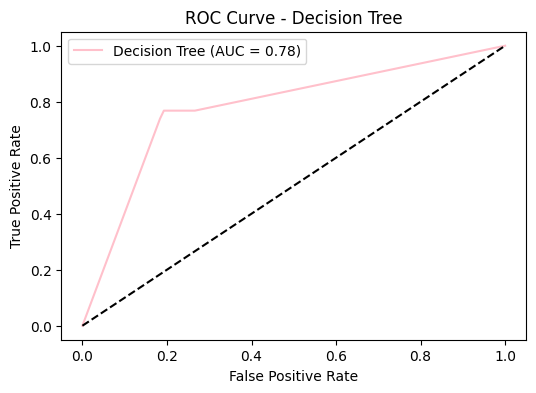

In [56]:
dt_pred = dt_model.predict(X_test)
dt_prob = dt_model.predict_proba(X_test)[:,1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_prob)
auc_dt = roc_auc_score(y_test, dt_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr_dt, tpr_dt, color='pink', label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend()
plt.show()


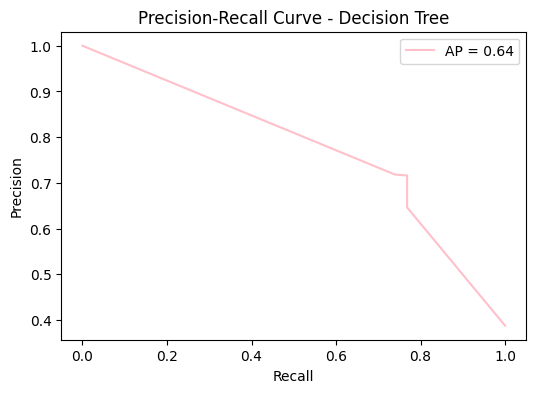

In [55]:
precision_dt, recall_dt, _ = precision_recall_curve(y_test, dt_prob)
avg_precision_dt = average_precision_score(y_test, dt_prob)

plt.figure(figsize=(6,4))
plt.plot(recall_dt, precision_dt, color='pink', label=f'AP = {avg_precision_dt:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Decision Tree')
plt.legend()
plt.show()


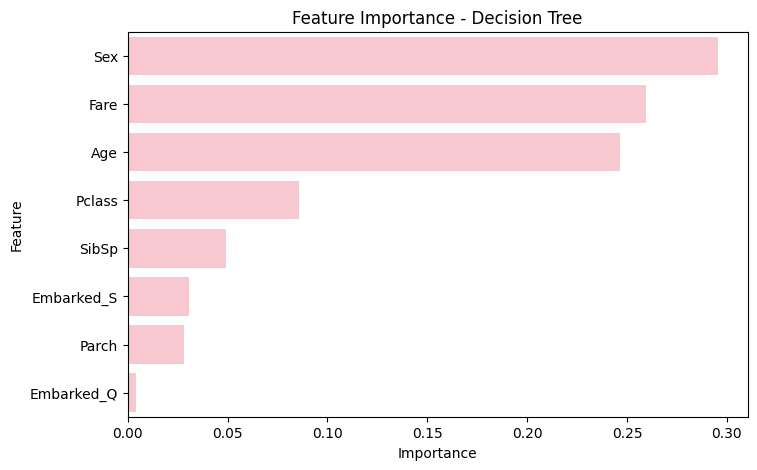

In [61]:
feature_importance_dt = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(data=feature_importance_dt, x='Importance', y='Feature', color='pink')
plt.title('Feature Importance - Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


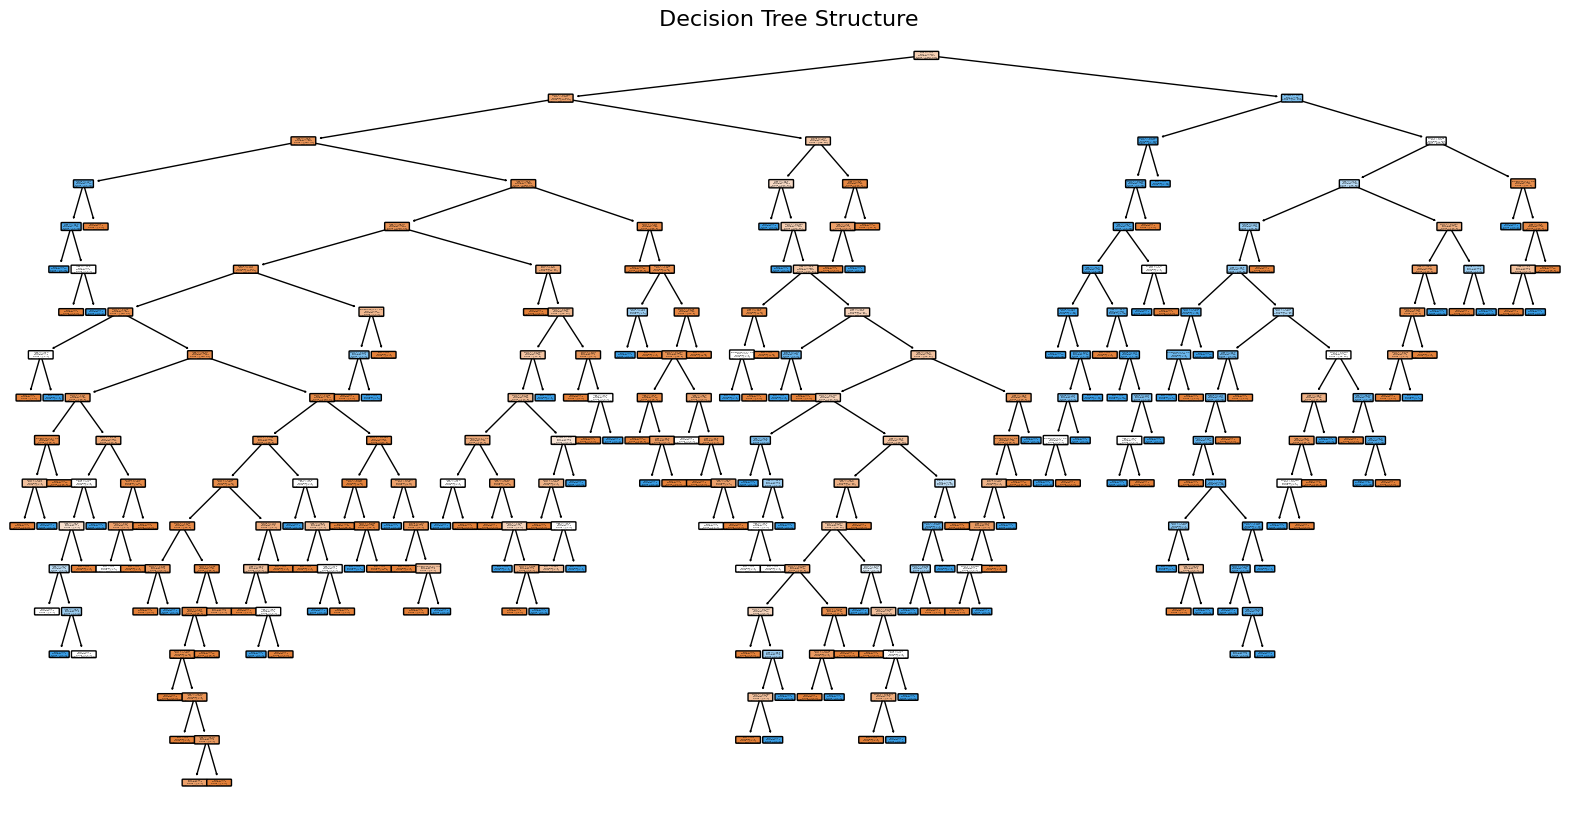

In [63]:

from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dt_model,
          feature_names=X.columns,
          class_names=['Not Survived', 'Survived'],
          filled=True, rounded=True)
plt.title(" Decision Tree Structure", fontsize=16)
plt.show()

## compare models

In [64]:
log_prob = lr_model.predict_proba(X_test)[:, 1]
rf_prob = rf_model.predict_proba(X_test)[:, 1]
dt_prob = dt_model.predict_proba(X_test)[:, 1]

fpr_log, tpr_log, _ = roc_curve(y_test, log_prob)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_prob)
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_prob)

auc_log = roc_auc_score(y_test, log_prob)
auc_rf = roc_auc_score(y_test, rf_prob)
auc_dt = roc_auc_score(y_test, dt_prob)


/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


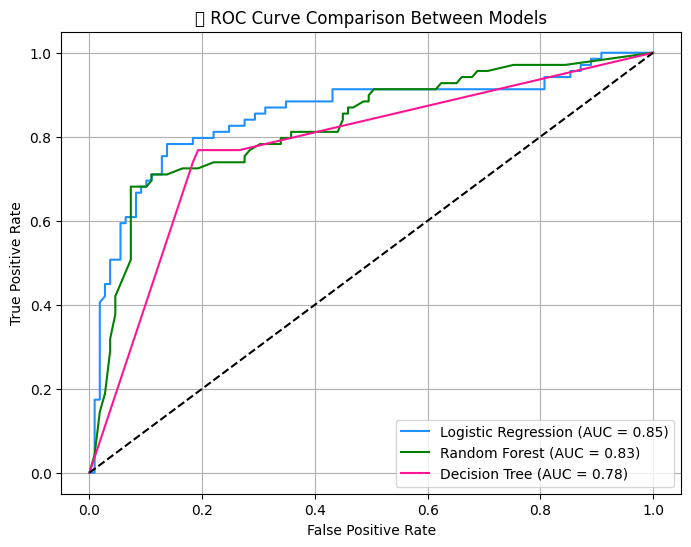

In [65]:
plt.figure(figsize=(8,6))

plt.plot(fpr_log, tpr_log, color='dodgerblue', label=f'Logistic Regression (AUC = {auc_log:.2f})')


plt.plot(fpr_rf, tpr_rf, color='green', label=f'Random Forest (AUC = {auc_rf:.2f})')


plt.plot(fpr_dt, tpr_dt, color='deeppink', label=f'Decision Tree (AUC = {auc_dt:.2f})')


plt.plot([0,1], [0,1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('🌟 ROC Curve Comparison Between Models')
plt.legend()
plt.grid(True)
plt.show()


In [67]:

log_acc = accuracy_score(y_test, lr_model.predict(X_test))
rf_acc = accuracy_score(y_test, rf_model.predict(X_test))
dt_acc = accuracy_score(y_test, dt_model.predict(X_test))

compare_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree'],
    'Accuracy': [log_acc, rf_acc, dt_acc],
    'AUC': [auc_log, auc_rf, auc_dt]
})

print(compare_df.sort_values(by='AUC', ascending=False).to_string(index=False))


              Model  Accuracy      AUC
Logistic Regression  0.803371 0.852214
      Random Forest  0.747191 0.826951
      Decision Tree  0.792135 0.779949
